<a href="https://colab.research.google.com/github/PGM-Lab/2022-ProbAI/blob/main/Day1/notebooks/students_PPLs_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# Setup
Let's begin by installing and importing the modules we'll need.

In [ ]:
!pip install -q --upgrade pyro-ppl torch
import pyro
import torch
import pyro.distributions as dist

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 1. **Pyro’s distributions** (http://docs.pyro.ai/en/stable/distributions.html) :


Pyro provides a wide range of distributions: **Normal, Beta, Cauchy, Dirichlet, Gumbel, Poisson, Pareto, etc.**

In [ ]:
normal = dist.Normal(0,1)
normal

Normal(loc: 0.0, scale: 1.0)


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Samples from the distributions are [Pytorch’s Tensor objects](https://pytorch.org/cppdocs/notes/tensor_creation.html) (i.e. multidimensional arrays).


In [ ]:
sample = normal.sample()
sample

tensor(-0.2784)

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample

tensor([[[-0.0723,  0.1347, -0.7517,  1.4048, -0.9184],
         [-0.1638,  1.0152,  0.7876,  0.8016,  0.3240],
         [ 0.0284,  0.0891,  0.3034,  0.5242,  2.3427],
         [-2.0929, -0.0485, -0.2870,  1.6723,  1.2046]],

        [[-0.3666,  0.4709,  0.1562, -0.5963,  0.4918],
         [ 0.1069, -2.4526,  0.5966, -0.4726, -0.5487],
         [-0.3617,  0.6021,  0.2340, -0.1932,  0.0434],
         [ 1.2081, -0.4983, -0.8905,  0.2463,  0.3022]],

        [[ 0.8770,  0.3856,  0.2418, -0.3255,  1.4699],
         [-0.2341,  0.7672, -1.4356,  0.1688, -1.6192],
         [-0.3618,  1.4169,  1.0627,  0.7917,  0.4672],
         [-0.7850, -1.5784,  0.1516, -1.5041, -0.1106]]])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We can query the **dimensionlity** of a tensor with the ``shape`` property

In [ ]:
sample = normal.sample(sample_shape=[3,4,5])
sample.shape

torch.Size([3, 4, 5])


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Operations, like **log-likelihood**, are defined over tensors.

In [ ]:
normal.log_prob(sample)

tensor([[[-1.0310, -0.9692, -0.9441, -1.6502, -1.0553],
         [-0.9411, -1.2906, -1.7578, -1.2424, -0.9483],
         [-1.0191, -1.0354, -2.1821, -1.1456, -1.5559],
         [-0.9682, -2.6480, -0.9840, -1.6719, -1.2512]],

        [[-0.9944, -0.9860, -1.1717, -0.9440, -2.0977],
         [-0.9190, -1.0474, -0.9303, -1.3824, -0.9190],
         [-1.2609, -0.9300, -1.0001, -0.9466, -3.1727],
         [-1.1172, -1.1989, -0.9691, -1.4522, -2.1246]],

        [[-1.9932, -1.0383, -0.9240, -0.9812, -0.9778],
         [-1.2712, -1.0931, -1.0450, -1.4244, -0.9691],
         [-2.3447, -0.9226, -1.5010, -2.5015, -2.0469],
         [-1.2804, -0.9189, -0.9422, -2.0111, -1.0005]]])

In [ ]:
torch.sum(normal.log_prob(sample))

tensor(-79.0428)

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

**Multiple distributions** can be embedded in single object.

* Below we define **three Normal distributions with different means but the same scale** in a single object.


In [ ]:
normal = dist.Normal(torch.tensor([1.,2.,3.]),1.)
normal

Normal(loc: torch.Size([3]), scale: torch.Size([3]))

In [ ]:
normal.sample()

tensor([2.2795, 1.3640, 1.2685])

In [ ]:
normal.log_prob(normal.sample())

tensor([-0.9877, -0.9521, -1.3638])

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### **<span style="color:red">Exercise: Open the notebook and play around</span>**

* Test that everything works.
* Play a bit with the code in Section 1 of the notebook.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 2. **Pyro’s models** (http://pyro.ai/examples/intro_part_i.html) :


* In Pyro, a probabilistic model is defined as a **stochastic function** (i.e. every time it is run, it returns a new sample).

* Each random variable is associated with a **primitive stochastic function** using the construct ``pyro.sample(...)``.


### 2.1 A Temperature Model



As initial running example, we consider the problem of **modelling the temperature**. We first start with a simple model, where temperture is modeled using a random Normal variable.

In [ ]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    return temp

print(model())
print(model())

tensor(15.2603)
tensor(13.1841)


See how the model is a stochastic function which **returns a different value everytime it is invoked**. 

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 2.2 A Temperature-Sensor Model

In Pyro, a stochastic method is defined as a **composition of primitive stochastic functions**.

*The temperature Model:* 
We consider the presence of a **temperature sensor**. 
  * The temperature sensor gives **noisy observations** about the real temperature.
  * The **error** of the sensor's measurements **is known**.

A graphical representation of this model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>


In [ ]:
def model():
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 1.0))
    return (temp, sensor)

out1 = model()
out1

(tensor(12.7485), tensor(12.3214))


The above method defines a joint probability distribution:
$$p(sensor, temp) = p(sensor|temp)p(temp)$$




In this case, we have a simple dependency between the variables. But, as we are in a PPL, dependencies can be expressed in terms of complex deterministic functions (more examples later).



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


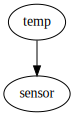

In [ ]:
#Visualize the model
pyro.render_model(model)

---

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# 3. **Pyro’s inference** (http://pyro.ai/examples/intro_part_ii.html) :

### Auxiliary inference functions (more details on Day 2)

To make inference on Pyro, we will use a variational inference method, which performs gradient-based optimization to solve the inference problem. More details will be given on Day 2. 

In [ ]:
#@title
from torch.distributions import constraints
from pyro.optim import SGD
from pyro.infer import Trace_ELBO
import matplotlib.pyplot as plt
from pyro.contrib.autoguide import AutoNormal


def svi(model, obs, guide=None, num_steps = 500, plot = False, verbose=False, lr=0.01):
    
    torch.manual_seed(999)

    pyro.clear_param_store()
    
    if guide is None:
        guide = AutoNormal(model)
    
    svi = pyro.infer.SVI(model=model,
                         guide=guide,
                         optim=SGD({"lr": lr, "momentum":0.1}),
                         loss=Trace_ELBO())

    losses, a,b  = [], [], []
    
    for t in range(num_steps):
        losses.append(svi.step(obs))
        if t%100==0:
            print('Step: '+str(t)+'. Loss: ' +str(losses[-1]))
            

    if (plot):
        plt.plot(losses)
        plt.title("ELBO")
        plt.xlabel("step")
        plt.ylabel("loss");
        plt.show()
        
    if verbose:
        print("Inference results:")
        for name, value in pyro.get_param_store().items():
            print(name, pyro.param(name))

* To make inference in Pyro over a given model we need to define a *guide*. This *guide* must have the same signature as its counterpart model. 

* The guide must provide samples for those variables of the model that are not observed, again using the ``pyro.sample`` construct. 

* Guides are also parametrized using Pyro's parameters (``pyro.param``), so the variational inference algorithm will optimize over these parameters. 

* All of that will be explained in detail on Day 2.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### 3.1  Conditioning on a single observation

Now, we continue with the last model defined in section 2.2, and assume we have a sensor reading and we want to compute the posterior distribution over the real temperature. 
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor.png?raw=1" alt="Drawing" width="150">
</center>

This can be achived by introducing **observations in the random variable** with the keyword ``obs=``.

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor(18.0)}

def model(obs):
    temp = pyro.sample('temp', dist.Normal(15.0, 2.0))
    sensor = pyro.sample('sensor', dist.Normal(temp, 0.1), obs=obs['sensor'])

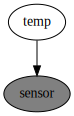

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Inference is made using the previously defined auxiliary functions, ``svi`` and ``guide``. This allows us to query the **posterior probability distribution**: 


$$p(temp | sensor=18)=\frac{p(sensor=18|temp)p(temp)}{\int p(sensor=18|temp)p(temp) dtemp}$$



Step: 0. Loss: 16147.421895861626
Step: 100. Loss: 5.638109087944031
Step: 200. Loss: 2.748673915863037
Step: 300. Loss: 2.5427181720733643
Step: 400. Loss: 2.9723092317581177


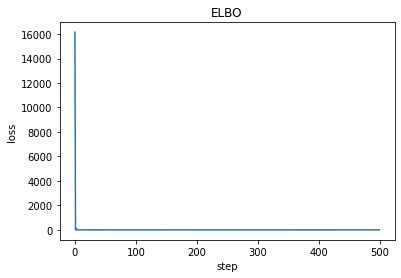

P(Temperature|Sensor=18.0) = 
Normal(loc: 18.043657302856445, scale: 18.043657302856445)



In [ ]:
#Run inference
svi(model,obs, plot=True)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.temp").item(), pyro.param("AutoNormal.locs.temp").item()))
print("")


* Inference is an **optimization procedure**. 

* The **ELBO function is minimized** during the variational inference process.

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.2  Learning from a bunch of observations

* Let us assume that we have a **set of observations** of the temperature at different time steps. 

* In this case, and following a probabilistic modelling approach, we define a **set of random variables**.

* One random variable for each **observation**, using a standard ``for-loop``.

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(15.0, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

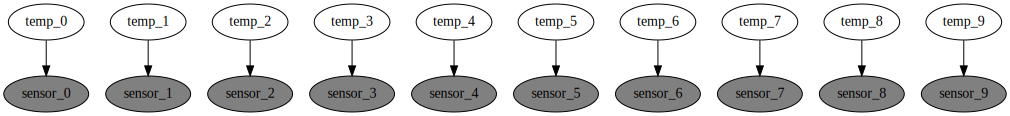

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

In [ ]:
#Run inference
svi(model, obs, verbose=True)

Step: 0. Loss: 2270.0551331043243
Step: 100. Loss: 191.25131821632385
Step: 200. Loss: 55.76117891073227
Step: 300. Loss: 42.96208876371384
Step: 400. Loss: 40.83998894691467
Inference results:
AutoNormal.locs.temp_0 Parameter containing:
tensor(17.4279, requires_grad=True)
AutoNormal.scales.temp_0 tensor(0.8460, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_1 Parameter containing:
tensor(17.9418, requires_grad=True)
AutoNormal.scales.temp_1 tensor(0.8459, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_2 Parameter containing:
tensor(18.2756, requires_grad=True)
AutoNormal.scales.temp_2 tensor(0.8490, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_3 Parameter containing:
tensor(17.2302, requires_grad=True)
AutoNormal.scales.temp_3 tensor(0.9022, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_4 Parameter containing:
tensor(19.3044, requires_grad=True)
AutoNormal.scales.temp_4 tensor(0.7995, grad_fn=<SoftplusBackward0>)
AutoNormal.locs.temp_5 Parameter containing:
tensor(20.9


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

What if we do **not know the mean temperature**? 

* We can **infer it from the data** by, e.g., using a **maximum likelihood** approach,
$$ \mu_{t} = \arg\max_\mu \ln p(s_1,\ldots,s_n|\mu) = \arg\max_\mu \prod_i \int_{t_i} p(s_i|t_i)p(t_i|\mu) dt_i, $$ where $s_i$ and $t_i$ denote the sensor reading and the real temperature at time $i$. 

* The graphical model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem_sensor4.png?raw=1" alt="Drawing" width="150">
</center>
* For now we do not consider the **underlying inference problem** We just define the model and let the **PPL's engine** make the work for us. 

* We use Pyro's parameters (defined as ``pyro.param``), which are free variables we can optimize. 


In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.param('mean_temp', torch.tensor(15.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

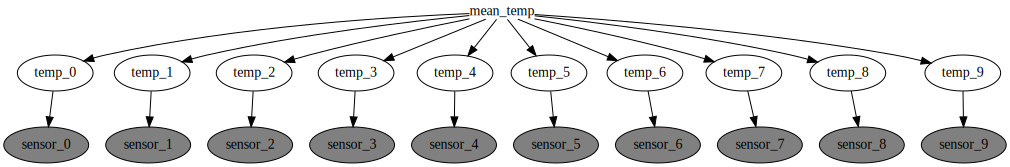

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ), render_params=True)

In [ ]:
#Run inference
svi(model, obs)

#Print results
print("Estimated Mean Temperature (MLE):")
mle_mean_temp = pyro.param("mean_temp").item() 
print(mle_mean_temp)

Step: 0. Loss: 2270.0551331043243
Step: 100. Loss: 247.77836674451828
Step: 200. Loss: 56.34299170970917
Step: 300. Loss: 23.71842250227928
Step: 400. Loss: 18.077348232269287
Estimated Mean Temperature (MLE):
19.568622589111328


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Instead of performing *maximum likelihood* learning, we can perform **Bayesian learning**:

* We treat the unknown quantity as a **random variable**.

This model can be graphically represented as follows:

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>



In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

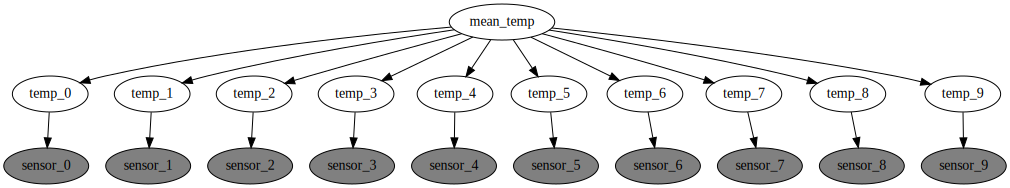

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

---
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

We perform inference over this model:

 $$ p(\mu_t | s_1,\ldots, s_n)=\frac{p(\mu_t)\prod_{i=1}^n \int p(s_i|t_i)p(t_i|\mu_t)dt_i }{\int \prod_{i=1}^n p(s_i|\mu_t)p(\mu_t) d\mu} $$


In [ ]:
import time
        
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 2015.5953184366226
Step: 100. Loss: 286.3637125492096
Step: 200. Loss: 57.62918394804001
Step: 300. Loss: 25.598888337612152
Step: 400. Loss: 23.2999709546566
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

4.840740203857422 seconds


---
* Observe that the result of the learning is **not a point estimate**.

* We have a **posterior distribution** which captures **uncertainty** about the estimation.

---

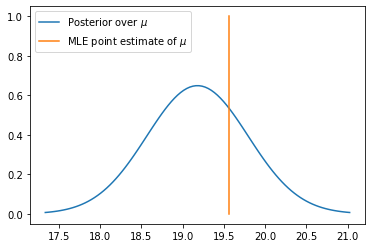

In [ ]:
import numpy as np
import scipy.stats as stats

mu = pyro.param("AutoNormal.locs.mean_temp").item()
scale = pyro.param("AutoNormal.scales.mean_temp").item()
x = np.linspace(mu - 3*scale, mu + 3*scale, 100)
plt.plot(x, stats.norm.pdf(x, mu, scale), label='Posterior over $\mu$')
point = mle_mean_temp # Previously calculated above
plt.plot([point, point],[0., 1.], label='MLE point estimate of $\mu$')
plt.legend()
plt.show()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### 3.3 The use of ``plate`` construct

Pyro can exploit **conditional independencies and vectorization** to make inference much faster. 

* This can be done with the construct **``plate``**. 

* With this construct, we can indicate that the variables $s_i$ and $t_i$ are **conditionally indepdendent** from another variables $s_j$ and $t_j$ given $\mu_t$. 

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/PGM-Tem-Sensor2.png?raw=1" alt="Drawing" width="150">
</center>


In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

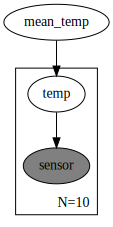

In [ ]:
#Visualize the model
pyro.render_model(model, model_args=(obs, ))

The ``plate`` construct reflects the standard notational use in graphical models denoting the **repetition of some parts of of the graph**. 

We can here make a distinction between **local** and **global** random variables: 

* **Local random variables** caputure **specific information** about the $i$-th data sample (i.e. the real temperature at this moment in time).

* **Global random variables** capture **common information** about all the data samples (i.e. the average temperature of all data samples). 


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


Observe how inference in this model is much **faster**. 

In [ ]:
#Run inference
start = time.time()
svi(model, obs)

#Print results
print("P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
end = time.time()
print(f"{(end - start)} seconds")

Step: 0. Loss: 2015.5951808691025
Step: 100. Loss: 286.3637121915817
Step: 200. Loss: 57.62918198108673
Step: 300. Loss: 25.59889566898346
Step: 400. Loss: 23.299971967935562
P(mean_temp|Sensor=[18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]) =
Normal(loc: 19.180583953857422, scale: 0.6147986650466919)

1.2701940536499023 seconds



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### **<span style="color:red">Exercise 1: </span>The role of *prior distributions* in learning**

In this exercise we just want to illustrate how the output of learning depends of the particular prior we introduce in the model. Play with different options and extract conclusions:

1. What happens if we change the mean of the prior?
2. What happens if we change the scale of the prior?
3. What happens to the posterior if the number of data samples deacreases and increases?

Step: 0. Loss: 1727.5616217187571
Step: 100. Loss: 249.61605195500675
Step: 200. Loss: 52.84599413357211
Step: 300. Loss: 24.67884164717097
Step: 400. Loss: 22.9093730209984
P(Temperature|Sensor=18.0) = 
Normal(loc: 17.815109252929688, scale: 0.6155012845993042)


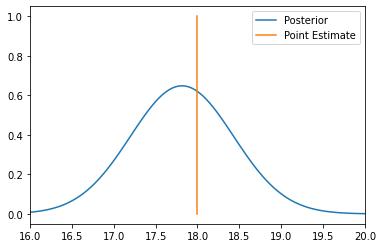

In [ ]:
#The observatons   
sample_size = 10
obs = {'sensor': torch.tensor(np.random.normal(18,2,sample_size))}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])

#Run inference
svi(model, obs)

#Print results
print("P(Temperature|Sensor=18.0) = ")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))

x = np.linspace(16, 20, 100)
plt.plot(x, stats.norm.pdf(x, pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()), label='Posterior')
point = 18
plt.plot([point, point],[0., 1.], label='Point Estimate')
plt.xlim(16,20)
plt.legend()
plt.show()


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


# **4.  Icecream Shop**


We have an ice-cream shop and assume thaat we **record the ice-cream sales and the average temperature of the day** (using a temperature sensor).

* We know that **temperature affects the sales** of ice-creams.

* We want to **model** how temperature affects ice-cream sales.

<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/Ice-cream_shop_-_Florida.jpg" alt="Drawing" width=300 >
</center>



<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We have **observations** from temperature and sales.

* Sales are modeled with a **Poisson** distribution:

>- The rate of the Poisson distribution **linearly depends of the real temperature**.

The figure below provides a graphical and probabilistic description of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model.png?raw=1" alt="Drawing" width=700>
</center>



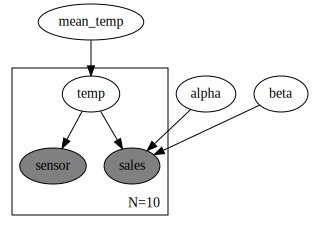

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


We again run the **(variational) inference engine** for estimating the posterior distributions.
* With PPLs, we only care about modeling, **not about the low-level details** of the machine-learning solver.


In [ ]:
#Run inference
svi(model, obs, num_steps = 3000, lr = 0.001)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))


Step: 0. Loss: 6918.239551782608
Step: 100. Loss: 1706.8237700462341
Step: 200. Loss: 1406.938106417656
Step: 300. Loss: 1167.6916875839233
Step: 400. Loss: 969.2326369285583
Step: 500. Loss: 804.8422137498856
Step: 600. Loss: 669.4960304498672
Step: 700. Loss: 560.7487533092499
Step: 800. Loss: 474.4860633611679
Step: 900. Loss: 392.1057023406029
Step: 1000. Loss: 340.65725284814835
Step: 1100. Loss: 280.30738401412964
Step: 1200. Loss: 257.1042993068695
Step: 1300. Loss: 207.26777589321136
Step: 1400. Loss: 189.91828846931458
Step: 1500. Loss: 164.5289467573166
Step: 1600. Loss: 154.52784037590027
Step: 1700. Loss: 126.25967526435852
Step: 1800. Loss: 117.71682906150818
Step: 1900. Loss: 112.76161724328995
Step: 2000. Loss: 100.08542639017105
Step: 2100. Loss: 98.10370969772339
Step: 2200. Loss: 92.16431868076324
Step: 2300. Loss: 80.70335939526558
Step: 2400. Loss: 79.52297711372375
Step: 2500. Loss: 71.627081990242
Step: 2600. Loss: 76.57995247840881
Step: 2700. Loss: 68.3530302047

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>


### <span style="color:red">Exercise 2: Introduce Humidity in the Icecream shop model </span> 
* Assume that we also have a bunch of **humidity sensor measurements**.
* Assume also that the **sales are also linearly influenced by the humidity**.

**Extend the previous model** with information about humidity measurements.

The figure provides a graphical and probabilistic specification of the model:
<center>
<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/Ice-Cream-Shop-Model-Humidity.png?raw=1" alt="Drawing" width=700>
</center>




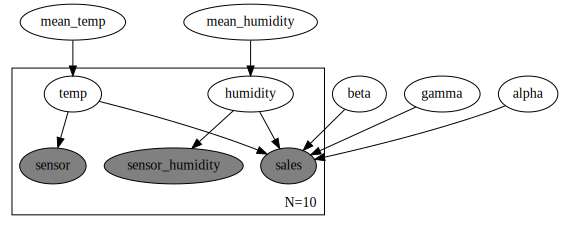

In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}


def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"

    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    
    ## Introduce a coefficient for the humidity "gamma"

    with pyro.plate('N='+str(obs['sensor'].shape[0]), obs['sensor'].shape[0]):
        temp = pyro.sample('temp', dist.Normal(mean_temp, 2.0))
        sensor = pyro.sample('sensor', dist.Normal(temp, 1.0), obs=obs['sensor'])
        #Add the 'humidity' variable and the 'sensor_humidity' variable

        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.001), alpha + beta*temp + ????)
        sales = pyro.sample('sales', dist.Poisson(rate), obs=obs['sales'])

#Visualize the model
pyro.render_model(model, model_args=(obs, ))

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.


In [ ]:
#Run inference
svi(model, obs, num_steps=3000, lr=0.001)

#Print results    
print("Posterior temperature mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_temp").item(), pyro.param("AutoNormal.scales.mean_temp").item()))
print("")
print("Posterior Humidity Mean")
print(dist.Normal(pyro.param("AutoNormal.locs.mean_humidity").item(), pyro.param("AutoNormal.scales.mean_humidity").item()))
print("")
print("Posterior alpha")
print(dist.Normal(pyro.param("AutoNormal.locs.alpha").item(), pyro.param("AutoNormal.scales.alpha").item()))
print("")
print("Posterior beta")
print(dist.Normal(pyro.param("AutoNormal.locs.beta").item(), pyro.param("AutoNormal.scales.beta").item()))
print("")
print("Posterior Gamma")
print(dist.Normal(pyro.param("AutoNormal.locs.gamma").item(), pyro.param("AutoNormal.scales.gamma").item()))


Step: 0. Loss: 43415.62390244007
Step: 100. Loss: 32385.001664161682
Step: 200. Loss: 26350.05538070202
Step: 300. Loss: 21488.486005723476
Step: 400. Loss: 17607.42182946205
Step: 500. Loss: 14453.095434904099
Step: 600. Loss: 11926.5579829216
Step: 700. Loss: 9850.370540440083
Step: 800. Loss: 8091.017843008041
Step: 900. Loss: 6682.5813729166985
Step: 1000. Loss: 5537.7136870622635
Step: 1100. Loss: 4582.031100511551
Step: 1200. Loss: 3812.805585503578
Step: 1300. Loss: 3114.9971845149994
Step: 1400. Loss: 2678.093333542347
Step: 1500. Loss: 2197.645199239254
Step: 1600. Loss: 1855.6751796603203
Step: 1700. Loss: 1547.3148487210274
Step: 1800. Loss: 1284.7618195414543
Step: 1900. Loss: 1079.2135246992111
Step: 2000. Loss: 926.1471285820007
Step: 2100. Loss: 821.3309555649757
Step: 2200. Loss: 681.423729121685
Step: 2300. Loss: 590.1314957737923
Step: 2400. Loss: 532.230705499649
Step: 2500. Loss: 449.05122858285904
Step: 2600. Loss: 413.5098954439163
Step: 2700. Loss: 381.9173864126

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

# 5.  **Temporal Models**

If we believe there is a temporal dependency between the variables, we can also encode this in the model. 

* E.g. the current **real temperature must be similar to the real temperature in the previous time step**.

* This temporal dependency can **be modeled** using a **for-loop** in Pyro

Consider the **graphical representation**.


<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/tempmodel-temporal-III.png" alt="Drawing" style="width: 350px;" >



In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1])}

def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])
        prev_temp = temp


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.positive)
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))
    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.positive)
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))

In [ ]:
import time
        
#Run inference
svi(model, obs, guide)

smooth_temp=[]
for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())

print('Finished')

Step: 0. Loss: 20.270625352859497
Step: 100. Loss: 21.953279852867126
Step: 200. Loss: 20.95933872461319
Step: 300. Loss: 19.39970576763153
Step: 400. Loss: 20.4621000289917
Finished


We can now plot the **observered measurements** of the temperature **against** the inferred **real temperature**.

* By querying the **local hidden** we can **smooth** the temperature.

* The **recovered temperature** is much less noisy than the measured one. 

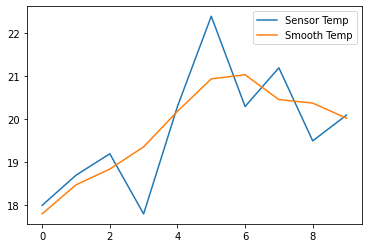

In [ ]:
import matplotlib.pyplot as plt
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

### <span style="color:red">Exercise 3:  Temporal Extension of the Iceacream shop model </span> 

This exercise **extends** Excersise 2.
* Assume temperature depends of the **temperature in the previous day**.
* Assume humidity depends of the **humidity in the previous day**.
* Assume sales depends on the **current temperature and humidity**.
* Use the **graphical representation below for reference**.

N.b. The plate representation has to be impemented in Pyro using a **``for-loop``**.
<img src="https://github.com/PGM-Lab/probai-2021-pyro/raw/main/Day1/Figures/icecream-model-temporal.png" alt="Drawing" width=500 >




In [ ]:
#The observatons   
obs = {'sensor': torch.tensor([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1]),
       'sales': torch.tensor([46., 47., 49., 44., 50., 54., 51., 52., 49., 53.]),
       'sensor_humidity': torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])}



def model(obs):
    mean_temp = pyro.sample('mean_temp', dist.Normal(15.0, 2.0))
    ## Introduce a random variable "mean_humidity"
    mean_humidity = pyro.sample('mean_humidity', dist.Normal(8.0, 2.0))


    alpha = pyro.sample('alpha', dist.Normal(0.0, 100.0))
    beta = pyro.sample('beta', dist.Normal(0.0, 100.0))
    ## Introduce a coefficient for the humidity "gamma"
    gamma = pyro.sample('gamma', dist.Normal(0.0, 100.0))

    for i in range(obs['sensor'].shape[0]):
        if i==0:
            temp = pyro.sample(f'temp_{i}', dist.Normal(mean_temp, 2.0))
            #Introduce the 'humidity' variable at time 0.

        else:
            temp = pyro.sample(f'temp_{i}', dist.Normal(prev_temp, 2.0))
            #Introduce the f'humidity_{i}' variable defining the transition


        sensor = pyro.sample(f'sensor_{i}', dist.Normal(temp, 1.0), obs=obs['sensor'][i])

        #Introduce the f'sensor_humidity_{i}' variable. 
        
        #Add the linear dependency for the rate with respect to temp and humidity (keep torch.max to avoid numerical stability issues)
        rate = torch.max(torch.tensor(0.01),alpha + beta*temp ????)
        sales = pyro.sample(f'sales_{i}', dist.Poisson(rate), obs=obs['sales'][i])

        prev_temp = temp
        #Keep humidity for the next time step. 
        prev_humidity = humidity

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

Again, we rely on the **(variational) inference engine** to get the results.

In [ ]:
#@title
#Define the guide
def guide(obs):
    mean = pyro.param("mean", torch.mean(obs['sensor']))
    scale = pyro.param("scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    mean_temp = pyro.sample('mean_temp', dist.Normal(mean, scale))

    meanH = pyro.param("meanH", torch.mean(obs['sensor_humidity']), constraint=constraints.positive)
    scaleH = pyro.param("scaleH", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    humidity_mean = pyro.sample('mean_humidity', dist.Normal(meanH, scaleH))


    alpha_mean = pyro.param("alpha_mean", torch.mean(obs['sensor']))
    alpha_scale = pyro.param("alpha_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    alpha = pyro.sample('alpha', dist.Normal(alpha_mean, alpha_scale))

    beta_mean = pyro.param("beta_mean", torch.tensor(0.0))
    beta_scale = pyro.param("beta_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    beta = pyro.sample('beta', dist.Normal(beta_mean, beta_scale))

    gamma_mean = pyro.param("gamma_mean", torch.tensor(0.0))
    gamma_scale = pyro.param("gamma_scale", torch.tensor(1.), constraint=constraints.greater_than(0.01))
    gamma = pyro.sample('gamma', dist.Normal(gamma_mean, gamma_scale))

    for i in range(obs['sensor'].shape[0]):
        mean_i = pyro.param(f'mean_{i}', obs['sensor'][i])
        scale_i = pyro.param(f'scale_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        temp = pyro.sample(f'temp_{i}', dist.Normal(mean_i, scale_i))
        meanH_i = pyro.param(f'meanH_{i}', obs['sensor_humidity'][i])
        scaleH_i = pyro.param(f'scaleH_{i}', torch.tensor(1.), constraint=constraints.greater_than(0.01))
        humidity_i = pyro.sample(f'humidity_{i}', dist.Normal(meanH_i, scaleH_i))

In [ ]:
import time
        
#Run inference
svi(model, obs, guide=guide, num_steps = 1000, lr=0.001)

smooth_temp=[]
smooth_humidity=[]

for i in range(obs['sensor'].shape[0]):
    smooth_temp.append(pyro.param(f'mean_{i}').item())
    smooth_humidity.append(pyro.param(f'meanH_{i}').item())

print('Finished')

Step: 0. Loss: 975.2505025863647
Step: 100. Loss: 501.32635974884033
Step: 200. Loss: 492.1584275960922
Step: 300. Loss: 508.6204282641411
Step: 400. Loss: 477.8078188896179
Step: 500. Loss: 465.78820753097534
Step: 600. Loss: 431.6601634025574
Step: 700. Loss: 430.0697173476219
Step: 800. Loss: 410.5656051039696
Step: 900. Loss: 431.8429548740387
Finished


<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>

* We can plot the observered measurements of the temperature against the **inferred real temperature** by our model. 

* The **recovered temperature** is much less noisy than the real one.


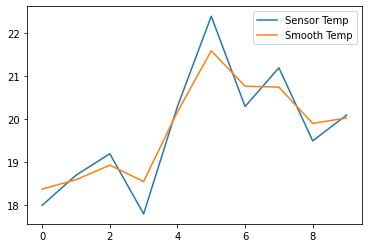

In [ ]:
plt.plot([18., 18.7, 19.2, 17.8, 20.3, 22.4, 20.3, 21.2, 19.5, 20.1], label='Sensor Temp')
plt.plot(smooth_temp, label='Smooth Temp')
plt.legend()

---
* We can plot the observered measurements of the humidity against the **inferred real humidity** by our model. 

* The **recovered humidity** is much less noisy than the real one.

---


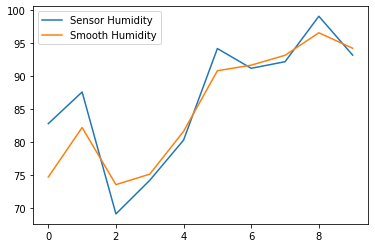

In [ ]:
humidity = torch.tensor([82.8, 87.6, 69.1, 74.2, 80.3, 94.2, 91.2, 92.2, 99.1, 93.2])
plt.plot(humidity.detach().numpy(), label='Sensor Humidity')
plt.plot(smooth_humidity, label='Smooth Humidity')
plt.legend()

<img src="https://github.com/PGM-Lab/probai-2021-pyro/blob/main/Day1/Figures/blue.png?raw=1" alt="Drawing" width=2000 height=20>
